# Project- Data Wrangling- WeRateDogs

## Introduction
In this project, We will gather and analyse data from a twitter handle.Data that we will analyse is tweet archive of user @dog_rates, also known as WeRateDogs. This account rates people's dogs. The tweets are funny and sarcastic. 

We will be using data from three different sources.
- First, The locally available twitter archived data file - "twitter-archive-enhanced.csv"
- Second, The tweet image predictions file "image_predictions.tsv" hosted on udacity's server. This file is based on a neural network that predicts the breed of dog in a particular picture. It provides us with three predictions along with the confidence interval for each one of them. We have to programmatically download this file.

- Third, Scrape data from Twitter. Using tweepy library, query the Twitter API and extract data using the tweet id's from the archived data.

## Gather

In [1]:
# import required libraries.
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

### 1. Twitter archived data 

Read data from the Local file

In [3]:
df_twt_archived = pd.read_csv("twitter-archive-enhanced.csv")
df_twt_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Prediction Data

Following file is downloaded programmatically from the given url using the requests library. Content from the webpage is stored as a tsv file. The read in using the pandas read_csv function.

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
response = requests.get(url)

In [5]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [6]:
df_image_prediction = pd.read_csv("image_predictions.tsv", sep='\t')
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Data from Twitter API.

Following, we are creating a API object to gather Twitter data. Tweepy libraray is used for this. Tweet data is stored in JSON format. Here, tweet id's from df_twt_archived will be used to query for data. Twitter has a rate limit to control rate of traffic sent and received. parameters 'wait_on_rate_limit' and 'wait_on_rate_limit_notify' are used to delegate the waiting to the API instance. Tweepy will wait for the rate limit to replenish and print a notification.

In [7]:
consumer_key = "YOUR CONSUMER KEY"
consumer_secret = "YOUR CONSUMER SECRET"
access_token = "YOUR ACCESS TOKEN"
access_secret = "YOUR ACCESS SECRET"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
df_twt_archived['tweet_id'][0]

892420643555336193

In [9]:
tweet = api.get_status(df_twt_archived['tweet_id'][0], tweet_mode='extended')
print(tweet)

Status(_api=<tweepy.api.API object at 0x7f86a1e42cf8>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

In [10]:
tweet._api

In [11]:
tweet._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

Tweets with the text field greater than 140 are truncated. To avoid any missing data, we set the parameter 'tweet_mode' to 'extended'. This allows tweepy to get the full_text field.

In [12]:
tweet_dct = {}
for tweet in df_twt_archived.tweet_id:
    try:
        tweet_tx = api.get_status(tweet, tweet_mode='extended')
        tweet_dct[str(tweet)] = tweet_tx._json
    except:
        print(f"ERROR: Error for Tweet id: {tweet}")
        

ERROR: Error for Tweet id: 888202515573088257
ERROR: Error for Tweet id: 873697596434513921
ERROR: Error for Tweet id: 872668790621863937
ERROR: Error for Tweet id: 872261713294495745
ERROR: Error for Tweet id: 869988702071779329
ERROR: Error for Tweet id: 866816280283807744
ERROR: Error for Tweet id: 861769973181624320
ERROR: Error for Tweet id: 856602993587888130
ERROR: Error for Tweet id: 851953902622658560
ERROR: Error for Tweet id: 845459076796616705
ERROR: Error for Tweet id: 844704788403113984
ERROR: Error for Tweet id: 842892208864923648
ERROR: Error for Tweet id: 838916489579200512
ERROR: Error for Tweet id: 837366284874571778
ERROR: Error for Tweet id: 837012587749474308
ERROR: Error for Tweet id: 829374341691346946
ERROR: Error for Tweet id: 827228250799742977
ERROR: Error for Tweet id: 812747805718642688
ERROR: Error for Tweet id: 802247111496568832
ERROR: Error for Tweet id: 775096608509886464
ERROR: Error for Tweet id: 770743923962707968
Rate limit reached. Sleeping for: 

In [13]:
with open('tweets_json.txt', 'w') as file:
    json.dump(tweet_dct, file, indent=4, ensure_ascii=False)

In [14]:
df_tweet_data = pd.read_json('tweets_json.txt', orient='index')
df_tweet_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37315,0,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8002,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32085,0,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5938,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24180,0,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3925,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40621,0,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8160,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38859,0,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8837,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-28 12:25:50.875897856,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19524,0,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2940,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-27 04:11:53.173991426,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11403,0,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1947,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-24 08:46:21.411237888,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",62910,0,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,17829,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-22 23:26:25.150312448,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",26864,0,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4041,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-18 16:57:35.349198849,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30779,0,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6962,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na.

## Access

In [5]:
df_twt_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_twt_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- All the columns related to retweets and replies will be used to remove entries that are replies or tweets. We are only looking for original tweets.

- Timestamp is of the datatype object. We have to convert it to datetime.

- Datatype of columnn 'twee_id' is 'int. It should be 'object'.


- Two seperate columns for numerator and denominator are not required. A single column 'rating' would do the work.

- Four seperate columns for Dog stage is not required. Will merge them to create a single 'dog_stage' column.

In [7]:
df_twt_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
df_twt_archived[df_twt_archived['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- We will have to look into these too high numerators denominators.
- No duplicate tweet-id's present in the data.

Next, I have tried to look into entries with no name and manually check for names and other incorrect data.

In [7]:
abc = df_twt_archived[df_twt_archived['name'] == 'None']['text']
for i in abc:
    print(i)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
Here we have a corgi undercover as a malamute. Pawbably doing impor

In [17]:
for a in df_twt_archived[(df_twt_archived['rating_numerator']< 10) & (df_twt_archived['name'] == 'None')]['text']:
    print(a)

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd
Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co

In [61]:
df_twt_archived[df_twt_archived['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


'RT @' followed by the id is concatenated before the actuall text of tweet in cases of retweets. 'retweeted_status_id' column will be used to detect these entries and remove it from analysis.

In [50]:
df_twt_archived[df_twt_archived['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [52]:
df_twt_archived[df_twt_archived['rating_numerator'] < 12]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
112,870804317367881728,NaN,NaN,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
152,862722525377298433,NaN,NaN,2017-05-11 17:34:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He passed the h*ck out. It's bar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862722525...,11,10,Dave,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None


Above are few of the combinations, I looked at to get an insight and detect any faults. 

In [11]:
df_twt_archived['text'][101]

'RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…'

In [36]:
df_twt_archived[df_twt_archived['tweet_id'] == 887517139158093824].text

22    I've yet to rate a Venezuelan Hover Wiener. Th...
Name: text, dtype: object

In [64]:
df_twt_archived.rating_numerator.min(), df_twt_archived.rating_denominator.min()

(0, 0)

In [22]:
df_twt_archived['text'][77]

"This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r"

In [100]:
df_twt_archived['text'][2030]

"This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq"

In [11]:
df_twt_archived['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [17]:
df_twt_archived[df_twt_archived['name'] == 'space']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is space pup. He's very confused. Tries t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671789708...,13,10,space,None,None,None,None


Column 'source' only has 4 unique value. These can replaced with respective strings that define the url and change the datatype to category.

In [67]:
df_twt_archived['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [4]:
for a in df_twt_archived[df_twt_archived['rating_numerator']/df_twt_archived['rating_denominator'] < 0.6]['text']:
    print(a)

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
Please stop sending it pictures that don't even have a doggo o

In [6]:
df_twt_archived[df_twt_archived['rating_numerator']/df_twt_archived['rating_denominator'] < 0.6][['tweet_id','name','rating_numerator','rating_denominator','retweeted_status_id','in_reply_to_status_id']]

,tweet_id,name,rating_numerator,rating_denominator,retweeted_status_id,in_reply_to_status_id
45,883482846933004288,Bella,5,10,NaN,NaN
315,835152434251116546,None,0,10,NaN,NaN
605,798576900688019456,None,1,10,6.661041e+17,NaN
730,781661882474196992,None,5,10,NaN,NaN
765,777885040357281792,Wesley,3,10,NaN,NaN
883,760252756032651264,Fido,4,10,NaN,NaN
912,757596066325864448,None,4,10,NaN,NaN
956,751583847268179968,None,5,10,NaN,NaN
1004,747816857231626240,a,4,10,NaN,NaN
1016,746906459439529985,None,0,10,NaN,7.468859e+17


There are a total of 59 entries in 'expanded_urls' that are null. But mostly these are for reply tweets and hence will be removed from data. Here we are left with the following 4 entries. Out of this one is for a retweet and will be dropped. Which leaves us with 3 null entries. I will leave it as it is for now.

In [19]:
df_twt_archived[(df_twt_archived['expanded_urls'].isna()) & (df_twt_archived['in_reply_to_status_id'].isna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [266]:
df_tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37355,0,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8021,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32101,0,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5949,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24206,0,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3932,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40650,0,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8184,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38877,0,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8859,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [267]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2334 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2334 non-null datetime64[ns]
display_text_range               2334 non-null object
entities                         2334 non-null object
extended_entities                2062 non-null object
favorite_count                   2334 non-null int64
favorited                        2334 non-null int64
full_text                        2334 non-null object
geo                              0 non-null float64
id                               2334 non-null int64
id_str                           2334 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

- A few columns filled with null values - contributors, coordinates, geo.
- Column 'place' only has a single non-null value.
- Retweets, reply tweets and quoted tweets are present. Such entries will be dropped. After that rows representing these entries won't be required and we will drop them.
- Quoted tweets are retweets with additional text added.
- Columns 'possibly_sensitive' and 'possibly_sensitive_appealable' contains info about the links shared in the tweet. We will drop this column.

In [28]:
df_tweet_data['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [6]:
df_tweet_data['extended_entities'][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

Column 'entities' and 'extended_entities' contain media related information. Various details about the pictures and videos included in the tweet.
- We will extract the hashtags info from 'entities' column.

In [29]:
df_tweet_data['lang'].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'], dtype=object)

In [92]:
df_tweet_data['lang'].value_counts()

en     2316
und       7
nl        3
in        3
et        1
ro        1
eu        1
es        1
tl        1
Name: lang, dtype: int64

Column 'lang' could have been useful but is too heavy on the language 'English' and won't help much with the analysis. Other languages are barely present. And other languages could be a result of retweets/reply/quoted tweets. And we might end up with just 'en'.

In [9]:
df_tweet_data[df_tweet_data['lang'] != 'en'][['in_reply_to_status_id','quoted_status_id','retweeted_status']]

,in_reply_to_status_id,quoted_status_id,retweeted_status
1998-01-29 06:09:20.059072513,NaN,8.860534e+17,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...
1997-04-04 18:13:13.139703809,NaN,NaN,{'created_at': 'Fri Aug 05 21:19:27 +0000 2016...
1996-07-23 19:31:17.551247360,8.381455e+17,NaN,NaN
1996-02-03 07:44:49.516937216,8.233264e+17,NaN,NaN
1995-03-25 10:00:00.683540480,NaN,7.961237e+17,NaN
1994-02-19 15:49:54.376806400,NaN,NaN,NaN
1993-09-30 15:31:33.750648834,NaN,NaN,NaN
1993-05-31 23:32:29.612572673,7.384119e+17,NaN,NaN
1992-04-28 20:00:24.099647488,7.044857e+17,NaN,NaN
1991-11-20 03:21:00.360429569,6.903413e+17,NaN,NaN


11 entries out of a total of 18 entries are from retweets/reply/quoted tweets. So we will be dropping the column 'lang'.

In [16]:
df_tweet_data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2200
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Column 'source' is already present in the df_twt_archived data. We will drop this column.

In [20]:
df_tweet_data['user'][0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8227519,
 'friends_count': 12,
 'listed_count': 6331,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 142484,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 10517,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/im

Column 'user' has information about the twitter user who posted the tweet. This info is not required for this analysis. We will drop this column.

In [15]:
df_tweet_data[['contributors','coordinates','geo']].nunique()

contributors    0
coordinates     0
geo             0
dtype: int64

In [10]:
df_tweet_data['favorited'].value_counts()

0    2334
Name: favorited, dtype: int64

In [11]:
df_tweet_data['truncated'].value_counts()

0    2334
Name: truncated, dtype: int64

Columns 'favorited' and 'truncated' only have a single value. Value '0' in column "truncated" denotes that we have the entire text field tweeted andhave not lost anything that was tweeted. Passing  tweet_mode='extended' in the get_status() might have came in handy for a few entries. We will drop these 2 columns.

In [14]:
df_tweet_data[df_tweet_data['retweeted_status'].notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-01-29 06:09:20.059072513,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,0,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,0,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-01-20 15:53:12.912609280,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,0,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,NaN,NaN,NaN,NaN,17562,0,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-11-10 02:56:19.576475649,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6469,0,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-11-01 17:19:37.348136964,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1228,0,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-10-31 16:41:50.768087041,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6344,0,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-10-23 12:52:52.832227328,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,0,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,77,0,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-09-16 18:33:38.259525634,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This is Coco. At first I though...,NaN,...,NaN,NaN,NaN,NaN,13958,0,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-09-04 01:49:08.698140672,NaN,NaN,2017-06-10 00:35:19,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This is Sierra. She's one preci...,NaN,...,NaN,NaN,NaN,NaN,1519,0,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-08-09 22:36:19.821445120,NaN,NaN,2017-06-04 00:46:17,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This is Dawn. She's just checki...,NaN,...,NaN,NaN,NaN,NaN,5470,0,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1997-07-11 16:44:37.480148993,NaN,NaN,2017-05-28 01:26:04,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: Say hello to Cooper. His expres...,NaN,...,NaN,NaN,NaN,NaN,2023,0,{'created_at': 'Sat May 27 19:39:34 +0000 2017...,"<a

In [116]:
lst_hshtag = []
def hashtg(row):
    for i in range(len(row['hashtags'])):
        lst_hshtag.append(row['hashtags'][i]['text'])

df_tweet_data['entities'].apply(hashtg);

In [117]:
lst_hshtag

['BarkWeek',
 'BarkWeek',
 'BarkWeek',
 'BarkWeek',
 'BarkWeek',
 'BarkWeek',
 'BATP',
 'Canada150',
 'PrideMonthPuppo',
 'PrideMonth',
 'PrideMonth',
 'dogsatpollingstations',
 'PrideMonth',
 'PrideMonth',
 'ScienceMarch',
 'K9VeteransDay',
 'GoodDogs',
 'WKCDogShow',
 'BellLetsTalk',
 'WomensMarch',
 'ImWithThor',
 'BarkWeek',
 'BarkWeek',
 'BarkWeek',
 'FinalFur',
 'LoveTwitter',
 'notallpuppers',
 'NoDaysOff',
 'swole']

In [8]:
for ent in df_tweet_data['entities']:
    print(ent['hashtags'])

[]
[]
[]
[]
[{'text': 'BarkWeek', 'indices': [129, 138]}]
[{'text': 'BarkWeek', 'indices': [129, 138]}]
[]
[]
[{'text': 'BarkWeek', 'indices': [113, 122]}]
[]
[{'text': 'BarkWeek', 'indices': [121, 130]}]
[]
[]
[]
[{'text': 'BarkWeek', 'indices': [109, 118]}]
[{'text': 'BarkWeek', 'indices': [129, 138]}]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'text': 'BATP', 'indices': [21, 26]}]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'text': 'Canada150', 'indices': [111, 121]}]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'text': 'PrideMonthPuppo', 'indices': [29, 45]}, {'text': 'PrideMonth', 'indices': [115, 126]}]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[{'text': 'PrideMonth', 'indices': [122, 133]}]
[]
[]
[]
[]
[{'text': 'dogsatpollingstations', 'indices': [21, 43]}]
[{'text': 'PrideMonth', 'indices': [66, 77]}]
[]
[]
[{'text': 'PrideMonth', 'indices': [39, 50]}]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


I planned to extract the hashtags from the 'entities' column of "df_tweet_data". But only a selected few entries have hashtags. Therefore, not extracting hashtags.

In [91]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- We will be using the best predictions i.e. the p1 values.
- So we will drop the columns related with p2 and p3 predictions.
- Underscore is present in breed names.
- There is inconsistency amongst breed. A few names start with a capital letter and few with small caps.

In [96]:
df_image_prediction[df_image_prediction['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


Entries with 'p1_dog' values as False do not seem very promising with p2 or p3 values as well. We will drop these entries.

In [98]:
df_image_prediction[df_image_prediction['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


No duplicated tweet id present in the data.

In [90]:
list_columns = pd.Series(list(df_twt_archived) + list(df_tweet_data) + list(df_image_prediction))
list_columns[list_columns.duplicated()]

30    in_reply_to_status_id
32      in_reply_to_user_id
46                   source
49                 tweet_id
dtype: object

reply columns will be dropped and we are also dropping source column in df_tweet_data. These column names won't be a problem. Column 'id_str' in 'df_tweet_data' will be rename to ' Tweet_id'. 'Tweet_id' column in all the 3 dataframes will serve as a primary key. we will merge the columns based on this column. 'tweet_id' does not have duplicates in any dataframe.

## Quality
### Archived Data - `df_twt_archived`
- Dog names incorrect - None, a, an, the, not, infuriating, such, mad, actually, incredibly, officially, one, very, life, just, getting, quite, unacceptable, this, all, my, old, by, JD,  are present as dog names.
  
- index 35;   Tweet id - 	 885518971528720385 - name - Howard
- index 22;   Tweet id -   887517139158093824 - name incorrect - such
- index 775;  Tweet id - 	 776201521193218049 - name incorrect - O'Malley
- index 852;  Tweet id - 	 765395769549590528 - name incorrect - Zoey
- index 992;  Tweet id - 	748692773788876800 - name incorrect - Quizno
- index 2030; Tweet id -	671789708968640512 - name incorrect - space pup	
- index 763;  Tweet id - 	778027034220126208 - Name - Sophie; Incorrect Rating - 11.7/10
- index 695;  Tweet id - 	786709082849828864 - Name -	Logan; Incorrect Rating - 9.75/10
- index 45;   Tweet id -  	883482846933004288 - Name - Bella; Incorrect Rating - 13.5/10
- index 1165; Tweet id - 	722974582966214656 - Name - None; Incorrect rating - 13/10
- index 2335; Tweet id - 	666287406224695296 - Incorrect name- no name in text; Incorrect rating - 9/10	
- index 516;  Tweet id - 	810984652412424192 - Name - Sam; Incorrect Rating - No rating present in text.
- index 979;  Tweet id - 	749981277374128128 - Name -	Atticus;Rating of 1776/10 is an outlier.
- index 2074; Tweet id - 	670842764863651840 - Name - None; This is not a dog rating. It has snopp dogg.
- Some entries are not Dog ratings.
        705  785639753186217984 Pinot
        765	 777885040357281792	Wesley
        883	 760252756032651264	Fido
        1016	746906459439529985	None
        2338	666104133288665088	None
        2261	667549055577362432	None
        2109	670449342516494336	None
        2091	670783437142401025	None
- 'None' instead of  Nan in dog stage columns and name column.
- Retweets are present in data.
- Search for Dog stage in the tweet text.

### `df_tweet_data`
- Retweet and quoted entries are present.

### `df_image_prediction`
- Underscore is present between words in dog breeds predictions.
- Inconsistency in dog breed in capitalization.
- Drop entries with dog prediction as False.



## Tidiness
### `df_twt_archived`
- Column 'rating_numerator' is int 'datatype'.
- Datatype of column timestamp is 'object'
- Datatype of tweet_id is 'int'
- unnecessary columns for dog stage - doggo, puppo, pupper and flopper
- Remove columns not necessary for analysis
- Column 'source' only has 4 unique values and the datatype of source is object.

### `df_tweet_data`
- Rename column 'id_str' to 'tweet_id' and change datatype to 'object'.
- hashtags column can be included.(Only a few entries have hashtags).
- Remove columns not necessary for analysis

### `df_image_prediction`
- Datatype of Column 'tweet_id' is 'int' 
- Remove columns related to p2 and p3 predictions.

#### Merge all the 3 dataframes to form a single dataframe with all details for analysis.

## Clean

In [16]:
# Make copies of Dataframes to clean.
df_archived_clean = df_twt_archived.copy()
df_tweet_clean = df_tweet_data.copy()
df_image_clean = df_image_prediction.copy()

#### Erroneous Datatypes

####  Define
- Change the datatype of Column 'rating_numerator' from 'int' to 'float'.
- Change the datatype of column 'timestamp' from 'object' to 'datetime'.
- Change the datatype of column 'tweet_id' from 'int' to 'object'.

##### Code

In [17]:
df_archived_clean['rating_numerator'] = df_archived_clean['rating_numerator'].astype(float)
df_archived_clean['timestamp'] = pd.to_datetime(df_archived_clean['timestamp'])
df_archived_clean['tweet_id'] = df_archived_clean['tweet_id'].astype(str)

##### Test

In [18]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

##### Define

Column 'source' has 4 unique values and the url is not required. Replace the url and change the datatype to 'category'.

##### Code

In [19]:
source = df_archived_clean['source'].unique().tolist()
df_archived_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
src_replace = ["iPhone","Twitter","Vine","TweetDeck"]
df_archived_clean['source'].replace(source, src_replace, inplace=True)

In [21]:
df_archived_clean['source'] = df_archived_clean['source'].astype('category')

##### Test

In [22]:
df_archived_clean['source'].unique()

[iPhone, Twitter, Vine, TweetDeck]
Categories (4, object): [iPhone, Twitter, Vine, TweetDeck]

In [23]:
df_archived_clean['source'].value_counts()

iPhone       2221
Vine           91
Twitter        33
TweetDeck      11
Name: source, dtype: int64

The url's are replaced with respective titles and the value count confirms the task is successful.

##### Define

Replace the value 'None' in columns of Dog stages with Nan.

##### Code

In [24]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']
    
for col in col_list:
    df_archived_clean[col] = df_archived_clean[col].replace('None', np.nan)

##### Test

In [25]:
for col in col_list:
    print(df_archived_clean[col].unique())

[nan 'doggo']
[nan 'floofer']
[nan 'pupper']
[nan 'puppo']


### Incorrect Data

`df_twt_archived` - **Incorrect names present in names column**

##### Define
Replace the random names in 'names' column with Nan.

##### Code

In [26]:
name_list = ['None', 'a', 'an', 'the', 'not', 'infuriating', 'such', 'mad', 'actually', 'incredibly', 'officially',
             'one', 'very', 'life', 'light', 'just', 'getting', 'quite', 'unacceptable', 'this', 'all',
             'my', 'old', 'by', 'JD']

df_archived_clean['name'].replace(name_list, np.nan, inplace=True)

##### Test

In [27]:
for name in name_list:
    if name in df_archived_clean['name']:
        print(f'{name} is present')

In [28]:
name_list_uni = df_archived_clean['name'].unique().tolist()
for name in name_list:
    if name in name_list_uni:
        print(f'{name} is present')

From above tests, we can check that the names from list 'name_list' have been removed from the column 'name'.

##### Define

Replace the Nan or incorrect names with the identified correct names from 'text'.

##### Code

In [29]:
df_archived_clean.loc[35, 'name'] = 'Howard'
df_archived_clean.loc[775, 'name'] = "O'Malley"
df_archived_clean.loc[852, 'name'] = 'Zoey'
df_archived_clean.loc[992, 'name'] = 'Quizno'
df_archived_clean.loc[2030, 'name'] = 'space pup'

##### Test

In [30]:
for name in [35,775,852,992,2030]:
    print(df_archived_clean['name'][name])

Howard
O'Malley
Zoey
Quizno
space pup


##### Define

Replace the following entries of incorrect rating with the correct ones identified from 'text'.
- index 763;  Tweet id - 	778027034220126208 - Name - Sophie; Incorrect Rating - 11.7/10
- index 695;  Tweet id - 	786709082849828864 - Name -	Logan; Incorrect Rating - 9.75/10
- index 45;   Tweet id -  	883482846933004288 - Name - Bella; Incorrect Rating - 13.5/10
- index 1165; Tweet id - 	722974582966214656 - Name - None; Incorrect rating - 13/10
- index 2335; Tweet id - 	666287406224695296 - Incorrect name- no name in text; Incorrect rating - 9/10
- index 516;  Tweet id - 	810984652412424192 - Name - Sam; Incorrect Rating - No rating present in text.

##### Code

In [31]:
df_archived_clean.loc[763, 'rating_numerator':'rating_denominator'] = float(11.7), int(10)
df_archived_clean.loc[695, 'rating_numerator':'rating_denominator'] = float(9.75), int(10)
df_archived_clean.loc[45, 'rating_numerator':'rating_denominator'] = float(13.5), int(10)
df_archived_clean.loc[1165, 'rating_numerator':'rating_denominator'] = float(13), int(10)
df_archived_clean.loc[2335, 'rating_numerator':'rating_denominator'] = float(9), int(10)
df_archived_clean.loc[516, 'rating_numerator':'rating_denominator'] = np.nan, np.nan

##### Test

In [32]:
for i in [763,695,45,1165,2335,516]:
    print(df_archived_clean.loc[i,'rating_numerator':'rating_denominator'])    

rating_numerator      11.7
rating_denominator      10
Name: 763, dtype: object
rating_numerator      9.75
rating_denominator      10
Name: 695, dtype: object
rating_numerator      13.5
rating_denominator      10
Name: 45, dtype: object
rating_numerator      13
rating_denominator    10
Name: 1165, dtype: object
rating_numerator       9
rating_denominator    10
Name: 2335, dtype: object
rating_numerator      NaN
rating_denominator    NaN
Name: 516, dtype: object


##### Define

Following entries are not Dog ratings. Remove these entries from Dataframe.
- index 979;  Tweet id - 	749981277374128128 - Name -	Atticus;Rating of 1776/10 is an outlier.
- index 2074; Tweet id - 	670842764863651840 - Name - None; This is not a dog rating. It has snopp dogg.
- Some entries are not Dog ratings.
        1265 709901256215666688
        1928 674045139690631169 
        705  785639753186217984 Pinot
        987  749036806121881602 Dietrich
        765	 777885040357281792	Wesley
        883	 760252756032651264	Fido
        1016	746906459439529985	None
        2338	666104133288665088	None
        2261	667549055577362432	None
        2109	670449342516494336	None
        2091	670783437142401025	None


##### Code

In [33]:
drop_rows = [979, 2074, 1265, 1928, 705, 987, 765, 883, 1016, 2338, 2261, 2109, 2091]
df_archived_clean.drop(drop_rows, inplace=True)

##### Test

In [34]:
for i in drop_rows:
    print(i in df_archived_clean.index)

False
False
False
False
False
False
False
False
False
False
False
False
False


##### Define

Include a column 'rating' which is a ratio of 'rating_numerator' and 'rating_denominator'.

##### Code

In [35]:
df_archived_clean['rating'] = df_archived_clean['rating_numerator']/df_archived_clean['rating_denominator']

##### Test

In [36]:
df_archived_clean['rating'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

##### Define

We only want original tweets in our dataframe. Data contains replies and retweets which can be detected by the columns 'retweeted_status_is' and 'in_reply_to_status_id'.

##### Code

In [37]:
df_archived_clean = df_archived_clean[df_archived_clean['retweeted_status_id'].isna()]
df_archived_clean = df_archived_clean[df_archived_clean['in_reply_to_status_id'].isna()]

##### Test

In [38]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null category
text                          2085 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2082 non-null object
rating_numerator              2084 non-null float64
rating_denominator            2084 non-null float64
name                          1388 non-null object
doggo                         82 non-null object
floofer                       10 non-null object
pupper                        229 non-null object
puppo                         24 non-null object
rating                        20

##### Define

- Drop columns that are not required for analysis. With no retweets and reply entries, all the columns related to these are to be dropped.
- With column 'rating' included, we do not require 'rating_numerator' and 'rating_denominator'.

##### Code

In [39]:
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
             'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator']
df_archived_clean.drop(drop_cols, axis=1, inplace=True)

##### Test

In [40]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2085 non-null object
timestamp        2085 non-null datetime64[ns]
source           2085 non-null category
text             2085 non-null object
expanded_urls    2082 non-null object
name             1388 non-null object
doggo            82 non-null object
floofer          10 non-null object
pupper           229 non-null object
puppo            24 non-null object
rating           2084 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), object(8)
memory usage: 181.4+ KB


##### Define

- Replace incorrect data in dog stage column with Nan.
- Search column 'text' for dog stages and store data in column 'stage'
- Check for entries with multiple dog stages.(Multiple dogs are present in tweets leading to multiple stages per entry).
- Combine columns - 'doggo', 'floofer', 'pupper' and 'puppo' and form a new column 'dog_stage'.
- For entries with multiple stages, mark them with stage- "multiple".
- Cross check for entries with "multiple" as stage.
- Check all the entries for missmatch in 'stage' and 'dog_stage' columns.
- Make appropriate changes in 'dog_stage' column.
- Drop the columns 'doggo', 'floofer', 'pupper', 'puppo' and 'stage'.
- Change the datatype of column 'dog_stage' from object to category.

These are multiple tasks, but all are related to cleaning the same column. Hence to have a continuity, I have included them in a single define and code area.

##### Code

In [41]:
df_archived_clean.loc[200, 'floofer'] = np.nan
df_archived_clean.loc[460, 'doggo'] = np.nan
df_archived_clean.loc[575, 'doggo'] = np.nan
df_archived_clean.loc[956, 'pupper'] = np.nan
df_archived_clean.loc[191, 'doggo'] = np.nan

In [42]:
df_archived_clean['stage'] = df_archived_clean['text'].str.lower().str.extract('(doggos*|floofers*|puppers*|puppos*)')
df_archived_clean['stage'].value_counts()

pupper     228
doggo       76
puppo       29
puppers     20
floofer      9
doggos       7
puppos       1
Name: stage, dtype: int64

In [43]:
df_archived_clean['stage'].replace('puppers', 'pupper', inplace=True)
df_archived_clean['stage'].replace('puppos', 'puppo', inplace=True)
df_archived_clean['stage'].replace('doggos', 'doggo', inplace=True)
df_archived_clean['stage'].value_counts()

pupper     248
doggo       83
puppo       30
floofer      9
Name: stage, dtype: int64

In [44]:
df_archived_clean['dog_stage'] = np.nan
def stage_chk(row):
    cnt = 0
    for stages in col_list:
        if row[stages] == stages:
            row['dog_stage'] = stages
            cnt += 1
    if cnt < 2:
        return row
    else:
        row['dog_stage'] = 'multiple'
        return row
        
df_archived_clean = df_archived_clean.apply(stage_chk, axis =1)

In [45]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id         2085 non-null object
timestamp        2085 non-null datetime64[ns]
source           2085 non-null object
text             2085 non-null object
expanded_urls    2082 non-null object
name             1388 non-null object
doggo            79 non-null object
floofer          9 non-null object
pupper           228 non-null object
puppo            24 non-null object
rating           2084 non-null float64
stage            370 non-null object
dog_stage        335 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 308.0+ KB


In [46]:
stg_index_list = df_archived_clean[df_archived_clean['stage'].notnull()].index.tolist()
stage_list = df_archived_clean[df_archived_clean['dog_stage'].notnull()].index.tolist()

In [47]:
df_archived_clean[df_archived_clean['dog_stage'] == 'multiple']

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating,stage,dog_stage
531,808106460588765185,2016-12-12 00:29:28,iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,NaN,doggo,NaN,pupper,NaN,1.2,pupper,multiple
733,781308096455073793,2016-09-29 01:42:20,Vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,NaN,doggo,NaN,pupper,NaN,1.2,pupper,multiple
889,759793422261743616,2016-07-31 16:50:42,iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,Maggie,doggo,NaN,pupper,NaN,1.2,doggo,multiple
1063,741067306818797568,2016-06-10 00:39:48,iPhone,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,NaN,doggo,NaN,pupper,NaN,1.2,pupper,multiple
1113,733109485275860992,2016-05-19 01:38:16,iPhone,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,NaN,doggo,NaN,pupper,NaN,1.2,doggo,multiple


In [48]:
for stage in df_archived_clean[df_archived_clean['dog_stage'] == 'multiple'].index:
    print(stage)
    print(df_archived_clean['text'][stage])

531
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
733
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
889
Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
1063
This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
1113
Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda


In [49]:
review_index = list(set(stg_index_list) - set(stage_list))
for i in review_index:
    print(i)
    print(df_archived_clean['text'][i])

1027
This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx
134
This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z
268
Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL
536
This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX
798
You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV
545
This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18
1826
Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai
934
Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/C

In [50]:
df_archived_clean.loc[1900]

tweet_id                                        674664755118911488
timestamp                                      2015-12-09 18:59:46
source                                                      iPhone
text             This is Rodman. He's getting destroyed by the ...
expanded_urls    https://twitter.com/dog_rates/status/674664755...
name                                                        Rodman
doggo                                                          NaN
floofer                                                        NaN
pupper                                                         NaN
puppo                                                          NaN
rating                                                           1
stage                                                       pupper
dog_stage                                                      NaN
Name: 1900, dtype: object

In [51]:
df_archived_clean.loc[1027, 'dog_stage'] = 'multiple'
df_archived_clean.loc[134, 'dog_stage'] = 'puppo'
df_archived_clean.loc[268, 'dog_stage'] = 'doggo'
df_archived_clean.loc[536, 'dog_stage'] = 'pupper'
df_archived_clean.loc[798, 'dog_stage'] = 'multiple'
df_archived_clean.loc[545, 'dog_stage'] = 'puppo'
df_archived_clean.loc[1826, 'dog_stage'] = 'multiple'
df_archived_clean.loc[934, 'dog_stage'] = 'multiple'
df_archived_clean.loc[296, 'dog_stage'] = 'puppo'
df_archived_clean.loc[1710, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1712, 'dog_stage'] = 'multiple'
df_archived_clean.loc[946, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1843, 'dog_stage'] = 'multiple'
df_archived_clean.loc[54, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1847, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1220, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1093, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1862, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1351, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1358, 'dog_stage'] = 'floofer'
df_archived_clean.loc[1228, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1743, 'dog_stage'] = 'multiple'
df_archived_clean.loc[83, 'dog_stage'] = 'doggo'
df_archived_clean.loc[85, 'dog_stage'] = 'puppo'
df_archived_clean.loc[477, 'dog_stage'] = 'doggo'
df_archived_clean.loc[2141, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1120, 'dog_stage'] = 'multiple'
df_archived_clean.loc[993, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1635, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1636, 'dog_stage'] = 'multiple'
df_archived_clean.loc[1254, 'dog_stage'] = 'multiple'
df_archived_clean.loc[106, 'dog_stage'] = 'puppo'
df_archived_clean.loc[1643, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1516, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1900, 'dog_stage'] = 'pupper'
df_archived_clean.loc[1779, 'dog_stage'] = 'multiple'

In [52]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id         2085 non-null object
timestamp        2085 non-null datetime64[ns]
source           2085 non-null object
text             2085 non-null object
expanded_urls    2082 non-null object
name             1388 non-null object
doggo            79 non-null object
floofer          9 non-null object
pupper           228 non-null object
puppo            24 non-null object
rating           2084 non-null float64
stage            370 non-null object
dog_stage        371 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 308.0+ KB


In [53]:
df_archived_clean.drop(col_list, axis=1, inplace=True)
df_archived_clean.drop('stage', axis=1, inplace=True)
df_archived_clean['dog_stage'] = df_archived_clean['dog_stage'].astype('category')

##### Test

In [54]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2085 non-null object
timestamp        2085 non-null datetime64[ns]
source           2085 non-null object
text             2085 non-null object
expanded_urls    2082 non-null object
name             1388 non-null object
rating           2084 non-null float64
dog_stage        371 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), object(5)
memory usage: 212.5+ KB


The total count of dog stages before this define-code section was 335 including multiple overlapping entries. The individual dog stages column have been dropped. The temporary stages column has been dropped. Datatype of'dog_stages' is category and we have included a new category 'multiple' in it.

##### Define

We only require original tweets. Remove tweet entries for retweets, replies and quoted tweets.

##### Code

In [56]:
df_tweet_clean = df_tweet_clean[df_tweet_clean['in_reply_to_status_id'].isna()]
df_tweet_clean = df_tweet_clean[df_tweet_clean['quoted_status_id'].isna()]
df_tweet_clean = df_tweet_clean[df_tweet_clean['retweeted_status'].isna()]

##### Tests

In [57]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2067 non-null datetime64[ns]
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                1965 non-null object
favorite_count                   2067 non-null int64
favorited                        2067 non-null int64
full_text                        2067 non-null object
geo                              0 non-null float64
id                               2067 non-null int64
id_str                           2067 non-null int64
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 n

##### Define

Remove all entries that are not required for analysis. 
- Columns 'contributors', 'coordinates', 'geo' have null values.
- Columns 'favorited' and 'truncated' have a single value throughout.
- Column 'user' has information about the user who tweeted.
- Column 'lang' mostly has 'en' for english and other values are barely present for namesake. This column is not required.
- Colummn 'possibly_sensitive' and 'possibly_sensitive_appealable' means that the tweet has a link. Not required.
- We already have 'source' column in df_archived_clean dataset.
- Column 'place' only has one non-null entry.
- Columns 'in_reply_to_screen_name', 'in_reply_to_status_id', 'retweeted', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', is_quote_status' and 'retweeted_status' are related to retweets, replies and quoted tweets. These entries are already removed. These columns now are not required.
- Column 'id' is not required as there is already another column 'id_str'. These two columns provide the tweet id. Datatype of both of these column is 'int'. We can remove either one of these.

##### Code

In [58]:
df_tweet_clean.drop(['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'retweeted',
                     'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'quoted_status', 'source',
                     'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'is_quote_status', 'id',
                     'retweeted_status', 'possibly_sensitive', 'possibly_sensitive_appealable', 'place', 'favorited', 
                     'user', 'truncated', 'lang'], axis=1, inplace=True)

##### Test

In [59]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 8 columns):
created_at            2067 non-null datetime64[ns]
display_text_range    2067 non-null object
entities              2067 non-null object
extended_entities     1965 non-null object
favorite_count        2067 non-null int64
full_text             2067 non-null object
id_str                2067 non-null int64
retweet_count         2067 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 145.3+ KB


##### Define
Change the datatype of column 'id' from int to object and rename the column name to 'tweet_id' to match it with column 'tweet_id' in Dataframe df_archived_clear.

##### Code

In [60]:
df_tweet_clean['id_str'] = df_tweet_clean['id_str'].astype(str)
df_tweet_clean.rename(columns={'id_str': 'tweet_id'}, inplace=True)

##### Test

In [61]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 8 columns):
created_at            2067 non-null datetime64[ns]
display_text_range    2067 non-null object
entities              2067 non-null object
extended_entities     1965 non-null object
favorite_count        2067 non-null int64
full_text             2067 non-null object
tweet_id              2067 non-null object
retweet_count         2067 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 145.3+ KB


##### Define

Drop entities and extended_entities columns from df_tweet_clean

##### Code

In [62]:
df_tweet_clean.drop(['entities', 'extended_entities'], axis=1, inplace=True)

##### Test

In [63]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 6 columns):
created_at            2067 non-null datetime64[ns]
display_text_range    2067 non-null object
favorite_count        2067 non-null int64
full_text             2067 non-null object
tweet_id              2067 non-null object
retweet_count         2067 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 113.0+ KB


##### Define
**Erroneous Datatypes**
- Changethe datatype of column 'tweet_id' from int to object

##### Code

In [64]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

##### Test

In [65]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define

Drop entries with 'p1_dog' value as False.

##### Code

In [66]:
df_image_clean['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [67]:
df_image_clean = df_image_clean[df_image_clean['p1_dog']]

##### Test

In [68]:
df_image_clean[df_image_clean['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
df_image_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

In [70]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 124.2+ KB


##### Define

- Drop columns related to p2 and p3 predictions. We are only considering the 1st prediction.
- We do not need the 'p1_dog' column anymore. Drop the column 'p1_dog'.
- Rename the columns 'p1' and 'p1_conf'.

##### Code

In [71]:
df_image_clean = df_image_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf']]
df_image_clean.rename(columns={'p1':'prediction', 'p1_conf':'confidence_interval'}, inplace=True)

##### Test

In [72]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id               1532 non-null object
jpg_url                1532 non-null object
img_num                1532 non-null int64
prediction             1532 non-null object
confidence_interval    1532 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.8+ KB


In [73]:
df_image_clean.head(3)

,tweet_id,jpg_url,img_num,prediction,confidence_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461


##### Define

- Replace the underscore in string in 'prediction' column with space.
- Capitalise the first of each word.

##### Code

In [74]:
df_image_clean['prediction'] = df_image_clean['prediction'].str.replace('_', ' ').str.title()

##### Test

In [75]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311


In [76]:
column_list = pd.Series(list(df_archived_clean) + list(df_tweet_clean) + list(df_image_clean))
column_list[column_list.duplicated()]

12    tweet_id
14    tweet_id
dtype: object

##### Define

Merge all the 3 dataframes 'df_archived_clean', 'df_tweet_clean' and 'df_image_clean' into one dataframe

##### Code

In [77]:
a = set(df_archived_clean.tweet_id.tolist())
b = set(df_tweet_clean.tweet_id.tolist())
c = set(df_image_clean.tweet_id.tolist())

print(len(a))
print(len(a.intersection(b)))
print(len(a.intersection(c)))
print(len(a.intersection(b,c)))

2085
1341
1462
947


In [78]:
archive_master = df_archived_clean.merge(df_tweet_clean, on='tweet_id')
archive_master = archive_master.merge(df_image_clean, on='tweet_id', how='left')
archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,created_at,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,prediction,confidence_interval
0,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,2017-07-31 00:18:03,"[0, 121]",24180,This is Archie. He is a rare Norwegian Pouncin...,3925,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
1,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,2017-07-30 15:58:51,"[0, 79]",40621,This is Darla. She commenced a snooze mid meal...,8160,NaN,NaN,NaN,NaN
2,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,2017-07-29 16:00:24,"[0, 138]",38859,This is Franklin. He would like you to stop ca...,8837,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,1.3,NaN,2017-07-29 00:08:17,"[0, 138]",19524,Here we have a majestic great white breaching ...,2940,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake Bay Retriever,0.425595
4,890729181411237888,2017-07-28 00:22:40,iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,1.3,NaN,2017-07-28 00:22:40,"[0, 118]",62910,When you watch your owner call another dog a g...,17829,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142


In [79]:
archive_master.drop(['text', 'created_at'], axis=1, inplace=True)

In [80]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1340
Data columns (total 15 columns):
tweet_id               1341 non-null object
timestamp              1341 non-null datetime64[ns]
source                 1341 non-null object
expanded_urls          1339 non-null object
name                   887 non-null object
rating                 1340 non-null float64
dog_stage              239 non-null category
display_text_range     1341 non-null object
favorite_count         1341 non-null int64
full_text              1341 non-null object
retweet_count          1341 non-null int64
jpg_url                947 non-null object
img_num                947 non-null float64
prediction             947 non-null object
confidence_interval    947 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 158.7+ KB


### Store

In [81]:
# Store all the dataframes as CSV Files.

archive_master.to_csv('twitter_archive_master.csv', index=False)
df_archived_clean.to_csv('twt_archive_clean.csv', index=False)
df_tweet_clean.to_csv('tweet_data_clean.csv', index=False)
df_image_clean.to_csv('image_clean.csv', index=False)

## Analyze

In [2]:
archive_master = pd.read_csv('twitter_archive_master.csv')

In [83]:
archive_master

,tweet_id,timestamp,source,expanded_urls,name,rating,dog_stage,display_text_range,favorite_count,full_text,retweet_count,jpg_url,img_num,prediction,confidence_interval
0,891815181378084864,2017-07-31 00:18:03,iPhone,https://twitter.com/dog_rates/status/891815181...,Archie,1.20,NaN,"[0, 121]",24180,This is Archie. He is a rare Norwegian Pouncin...,3925,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
1,891689557279858688,2017-07-30 15:58:51,iPhone,https://twitter.com/dog_rates/status/891689557...,Darla,1.30,NaN,"[0, 79]",40621,This is Darla. She commenced a snooze mid meal...,8160,NaN,NaN,NaN,NaN
2,891327558926688256,2017-07-29 16:00:24,iPhone,https://twitter.com/dog_rates/status/891327558...,Franklin,1.20,NaN,"[0, 138]",38859,This is Franklin. He would like you to stop ca...,8837,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,iPhone,https://twitter.com/dog_rates/status/891087950...,NaN,1.30,NaN,"[0, 138]",19524,Here we have a majestic great white breaching ...,2940,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake Bay Retriever,0.425595
4,890729181411237888,2017-07-28 00:22:40,iPhone,https://twitter.com/dog_rates/status/890729181...,NaN,1.30,NaN,"[0, 118]",62910,When you watch your owner call another dog a g...,17829,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142
5,890609185150312448,2017-07-27 16:25:51,iPhone,https://twitter.com/dog_rates/status/890609185...,Zoey,1.30,NaN,"[0, 122]",26864,This is Zoey. She doesn't want to be one of th...,4041,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish Terrier,0.487574
6,890006608113172480,2017-07-26 00:31:25,iPhone,https://twitter.com/dog_rates/status/890006608...,Koda,1.30,NaN,"[0, 130]",29598,This is Koda. He is a South Australian decksha...,6923,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979
7,889638837579907072,2017-07-25 00:10:02,iPhone,https://twitter.com/dog_rates/status/889638837...,Ted,1.20,NaN,"[0, 91]",26134,This is Ted. He does his best. Sometimes that'...,4251,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,French Bulldog,0.991650
8,889278841981685760,2017-07-24 00:19:32,iPhone,https://twitter.com/dog_rates/status/889278841...,Oliver,1.30,NaN,"[0, 138]",24342,This is Oliver. You're witnessing one of his m...,5060,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1.0,Whippet,0.626152
9,888917238123831296,2017-07-23 00:22:39,iPhone,https://twitter.com/dog_rates/status/888917238...,Jim,1.20,NaN,"[0, 86]",28100,This is Jim. He found a fren. Taught him how t...,4247,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1.0,Golden Retriever,0.714719


In [84]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 15 columns):
tweet_id               1341 non-null int64
timestamp              1341 non-null object
source                 1341 non-null object
expanded_urls          1339 non-null object
name                   887 non-null object
rating                 1340 non-null float64
dog_stage              239 non-null object
display_text_range     1341 non-null object
favorite_count         1341 non-null int64
full_text              1341 non-null object
retweet_count          1341 non-null int64
jpg_url                947 non-null object
img_num                947 non-null float64
prediction             947 non-null object
confidence_interval    947 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 157.2+ KB


Datatype of columns 'tweet_id', 'timestamp', 'source', and 'dog_stage' need to changed.

In [85]:
archive_master['tweet_id'] = archive_master['tweet_id'].astype(str)
archive_master['timestamp'] = pd.to_datetime(archive_master['timestamp'])
archive_master['source'] = archive_master['source'].astype('category')
archive_master['dog_stage'] = archive_master['dog_stage'].astype('category')

In [86]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 15 columns):
tweet_id               1341 non-null object
timestamp              1341 non-null datetime64[ns]
source                 1341 non-null category
expanded_urls          1339 non-null object
name                   887 non-null object
rating                 1340 non-null float64
dog_stage              239 non-null category
display_text_range     1341 non-null object
favorite_count         1341 non-null int64
full_text              1341 non-null object
retweet_count          1341 non-null int64
jpg_url                947 non-null object
img_num                947 non-null float64
prediction             947 non-null object
confidence_interval    947 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 139.3+ KB


In [87]:
archive_master.describe()

,rating,favorite_count,retweet_count,img_num,confidence_interval
count,1340.000000,1341.000000,1341.000000,947.000000,947.000000
mean,1.055593,8023.690529,2441.909023,1.204857,0.611138
std,0.206704,11166.984256,3928.346405,0.565253,0.259837
min,0.100000,75.000000,11.000000,1.000000,0.044333
25%,1.000000,1712.000000,557.000000,1.000000,0.390492
50%,1.100000,3690.000000,1210.000000,1.000000,0.610807
75%,1.200000,9865.000000,2865.000000,1.000000,0.841626
max,1.400000,124542.000000,58888.000000,4.000000,0.999956


In [88]:
archive_master.loc[archive_master['favorite_count'].idxmax()]

tweet_id                                              807106840509214720
timestamp                                            2016-12-09 06:17:20
source                                                            iPhone
expanded_urls          https://twitter.com/dog_rates/status/807106840...
name                                                             Stephan
rating                                                               1.3
dog_stage                                                            NaN
display_text_range                                               [0, 61]
favorite_count                                                    124542
full_text              This is Stephan. He just wants to help. 13/10 ...
retweet_count                                                      58888
jpg_url                https://pbs.twimg.com/ext_tw_video_thumb/80710...
img_num                                                                1
prediction                                         

In [89]:
archive_master.loc[archive_master['retweet_count'].idxmax()]

tweet_id                                              807106840509214720
timestamp                                            2016-12-09 06:17:20
source                                                            iPhone
expanded_urls          https://twitter.com/dog_rates/status/807106840...
name                                                             Stephan
rating                                                               1.3
dog_stage                                                            NaN
display_text_range                                               [0, 61]
favorite_count                                                    124542
full_text              This is Stephan. He just wants to help. 13/10 ...
retweet_count                                                      58888
jpg_url                https://pbs.twimg.com/ext_tw_video_thumb/80710...
img_num                                                                1
prediction                                         

The highest retweets and favorite counts were for the same tweet. The dog's name is Stephan and it is a Chihuahua and it has a rating of 1.3.

In [90]:
archive_master.loc[archive_master['rating'].idxmax()]

tweet_id                                              887517139158093824
timestamp                                            2017-07-19 03:39:09
source                                                            iPhone
expanded_urls          https://twitter.com/dog_rates/status/887517139...
name                                                                 NaN
rating                                                               1.4
dog_stage                                                            NaN
display_text_range                                              [0, 108]
favorite_count                                                     44673
full_text              I've yet to rate a Venezuelan Hover Wiener. Th...
retweet_count                                                      11077
jpg_url                                                              NaN
img_num                                                              NaN
prediction                                         

In [111]:
archive_master['rating'].value_counts()

1.000    312
1.200    310
1.100    263
1.300    165
0.900     99
0.800     67
0.700     35
0.600     22
1.400     18
0.500     17
0.300     12
0.400     11
0.200      5
1.170      1
1.350      1
0.975      1
0.100      1
Name: rating, dtype: int64

There are a lot of tweets with the rating of 1.4 . But there was one particular tweet with a rating of 1776/10 named 'Atticus'. But having this entry was an outlier. That's why it was dropped.

In [91]:
archive_master.loc[archive_master['confidence_interval'].idxmax()]

tweet_id                                              668636665813057536
timestamp                                            2015-11-23 03:46:18
source                                                            iPhone
expanded_urls          https://twitter.com/dog_rates/status/668636665...
name                                                                 NaN
rating                                                                 1
dog_stage                                                            NaN
display_text_range                                              [0, 139]
favorite_count                                                      1033
full_text              This is an Irish Rigatoni terrier named Berta....
retweet_count                                                        484
jpg_url                  https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg
img_num                                                                1
prediction                                         

In [92]:
archive_master.groupby('source').mean()

,rating,favorite_count,retweet_count,img_num,confidence_interval
source,,,,,
TweetDeck,1.128571,4415.571429,2059.428571,1.000000,0.540664
Twitter,1.044444,4052.055556,1766.444444,1.230769,0.541928
Vine,1.138095,8144.460317,3741.904762,NaN,NaN
iPhone,1.051194,8094.830008,2388.386273,1.205597,0.612486


In [93]:
archive_master.groupby('prediction').mean().idxmax()

rating                       Afghan Hound
favorite_count                     Saluki
retweet_count                Afghan Hound
img_num                Australian Terrier
confidence_interval              Komondor
dtype: object

In [94]:
archive_master.groupby('dog_stage').mean()

,rating,favorite_count,retweet_count,img_num,confidence_interval
dog_stage,,,,,
doggo,1.119048,13003.309524,4270.071429,1.321429,0.510555
floofer,1.150000,5520.250000,2101.750000,1.000000,0.494061
multiple,1.092308,8086.000000,2860.153846,1.142857,0.719690
pupper,1.071687,6549.012500,2099.831250,1.266667,0.649048
puppo,1.200000,16764.200000,4911.600000,1.375000,0.626688


In [95]:
archive_master.groupby(['dog_stage','source']).mean().idxmax()

rating                 (pupper, Twitter)
favorite_count             (puppo, Vine)
retweet_count              (puppo, Vine)
img_num                (pupper, Twitter)
confidence_interval    (pupper, Twitter)
dtype: object

In [96]:
archive_master['name'].value_counts()[:5]

Oliver     8
Lucy       7
Tucker     7
Winston    7
Penny      6
Name: name, dtype: int64

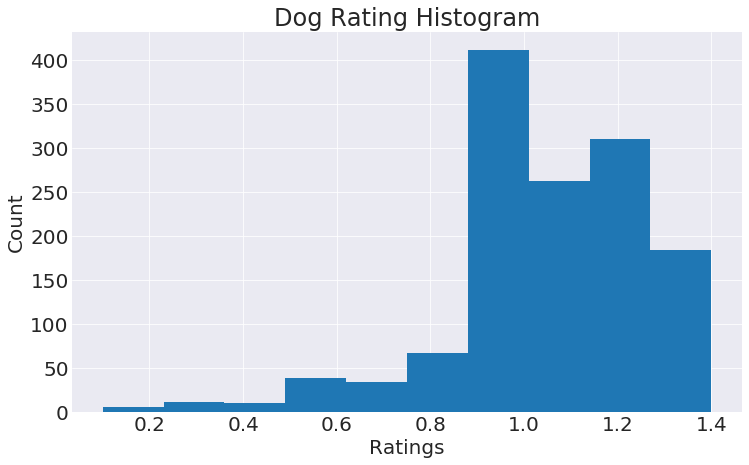

In [97]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size':20})
plt.title('Dog Rating Histogram')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.legend()
plt.hist(archive_master['rating'].dropna());

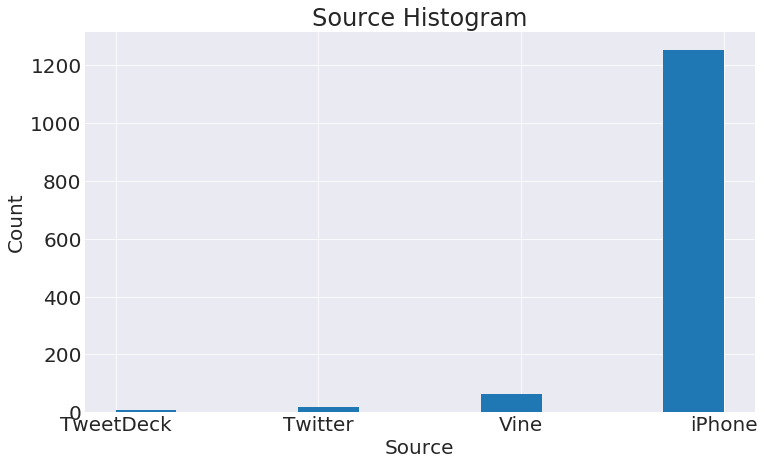

In [4]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size':20})
plt.title('Source Histogram')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend()
plt.hist(archive_master['source']);

In [5]:
archive_master['source'].value_counts()

iPhone       1253
Vine           63
Twitter        18
TweetDeck       7
Name: source, dtype: int64

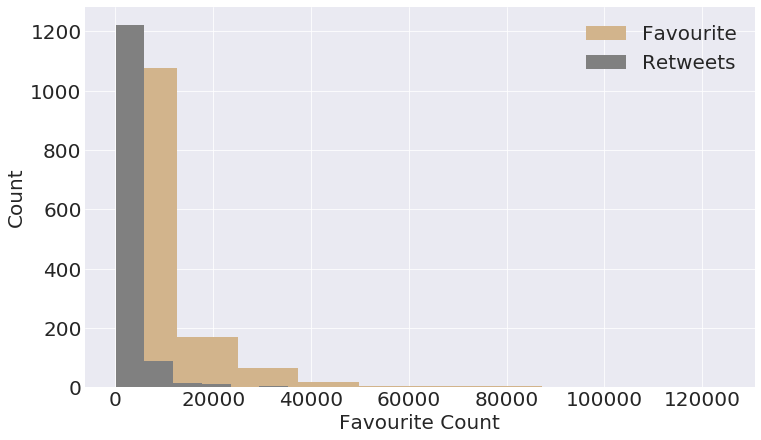

In [98]:
plt.figure(figsize=(12,7))
plt.xlabel('Favourite Count')
plt.ylabel('Count')
plt.hist(archive_master['favorite_count'], color= 'tan', label='Favourite');
plt.hist(archive_master['retweet_count'], color='gray', label='Retweets')
plt.legend()

As expected, Frequency is high for lower no of favorites and retweets and gradually decreases. Retweets and favorite count show a similar trend.

In [99]:
archive_master.corr()

,rating,favorite_count,retweet_count,img_num,confidence_interval
rating,1.000000,0.409537,0.318533,0.178499,0.095195
favorite_count,0.409537,1.000000,0.922922,0.139133,0.087911
retweet_count,0.318533,0.922922,1.000000,0.112419,0.054583
img_num,0.178499,0.139133,0.112419,1.000000,0.177605
confidence_interval,0.095195,0.087911,0.054583,0.177605,1.000000


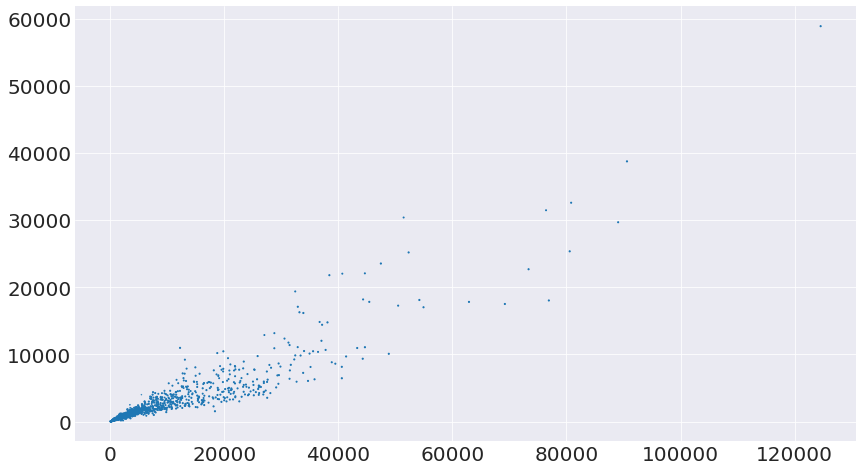

In [100]:
plt.figure(figsize=(14,8))
plt.scatter(archive_master['favorite_count'], archive_master['retweet_count'], s=archive_master['rating'] );

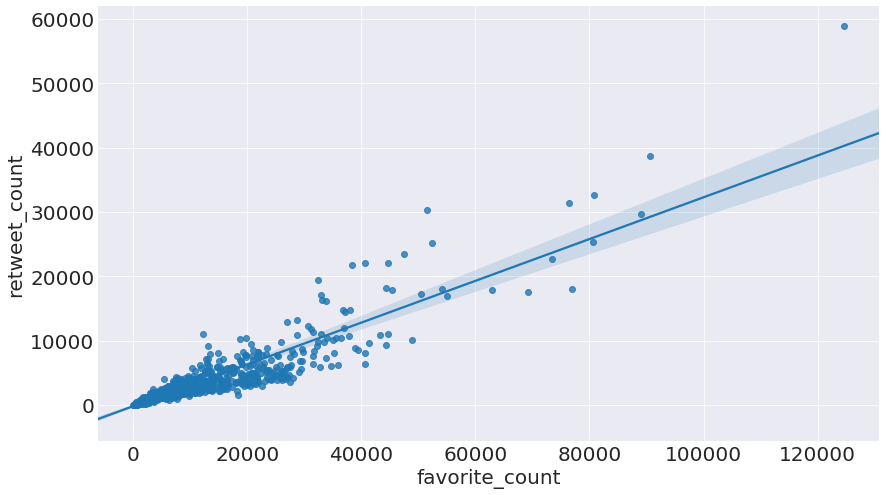

In [101]:
plt.figure(figsize=(14,8))
ax = sns.regplot(x="favorite_count", y="retweet_count", data=archive_master);

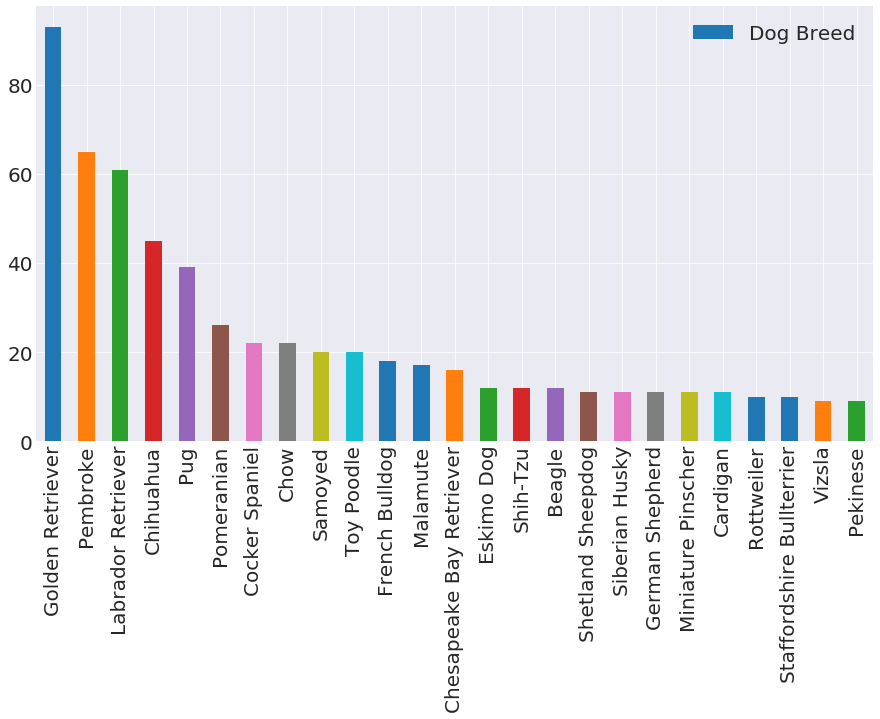

In [102]:
plt.figure(figsize=(15,8))
archive_master['prediction'].value_counts()[:25].plot(kind='bar', label= 'Dog Breed')
plt.legend()

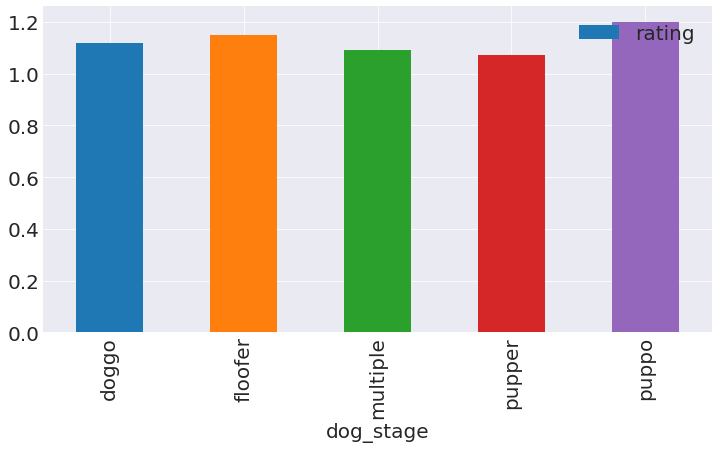

In [104]:
plt.figure(figsize=(12,6))
archive_master.groupby('dog_stage').mean()['rating'].plot(kind='bar')
plt.legend()

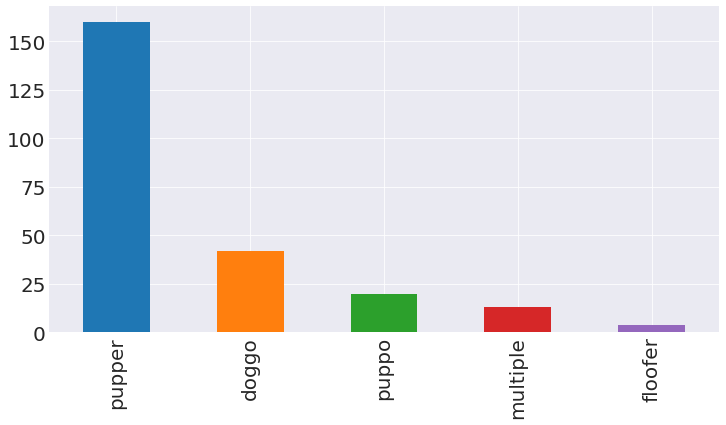

In [105]:
plt.figure(figsize=(12,6))
archive_master['dog_stage'].value_counts().plot(kind='bar')

In [106]:
df = archive_master[['prediction','retweet_count','favorite_count']].groupby('prediction').sum()

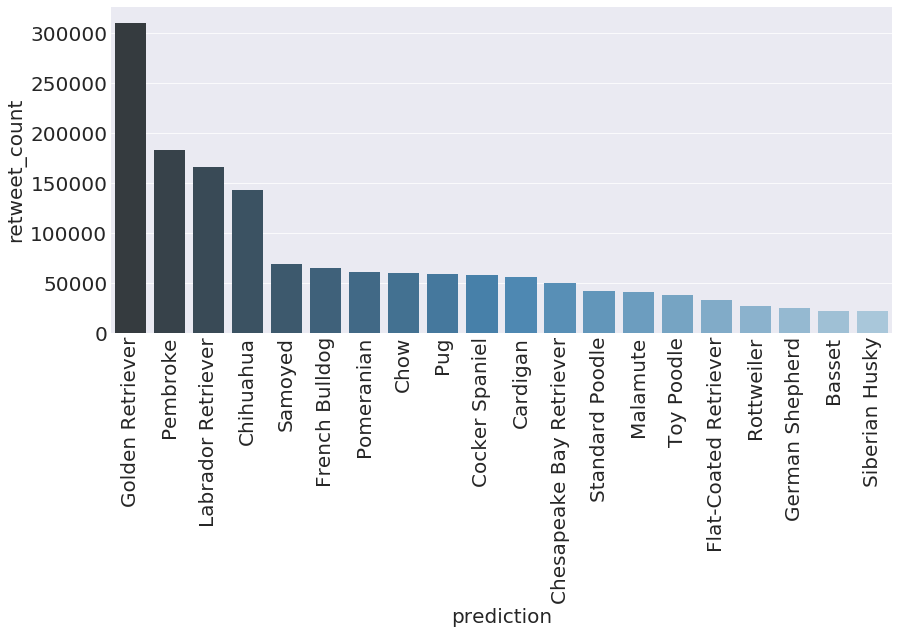

In [107]:
plt.figure(figsize=(14,6))
df1 = df.sort_values('retweet_count', ascending=False)[:20]
g = sns.barplot(y="retweet_count", x=df1.index, data=df1, palette=("Blues_d"))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
sns.set_context('talk')

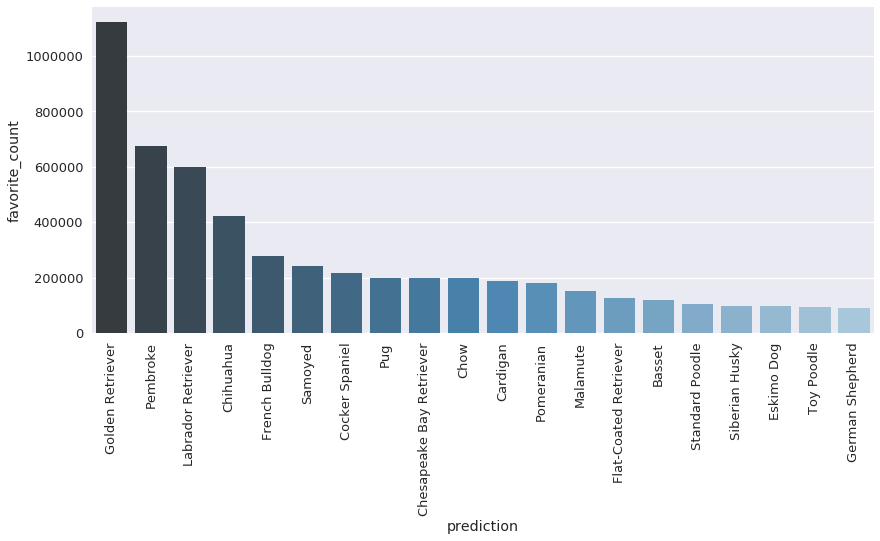

In [108]:
plt.figure(figsize=(14,6))
df1 = df.sort_values('favorite_count', ascending=False)[:20]
g = sns.barplot(y="favorite_count", x=df1.index, data=df1, palette=("Blues_d"))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
sns.set_context('talk')

## Conclusion

 As expected, retweet and favorite counts have a strong positive correlation. Retweet and favorite counts have a similar trend.
 Rating has moderate positive correlation with retweet and favorite count.
 Most of the tweets are from Iphone. We mostly have puppers in the data. But puppo leads the category with highest mean rating, retweets and favorite counts overall. Puppers are ahead on tweets from twitter web client and puppo are ahead on Vine. It's a neck and neck race in rating for all stages.
 
 Golden retriver has the most retweets and favorite counts. Followed by Pembroke, Labrador retriever, chihuahua, samoyed and French Bulldog.
 
 This project came with it's own complexities. It seems simple at first but there was a lot of work to be done. And part of it was the visual analysis. A slight distraction would have caused a probable quality issue to be identified. Visual analysis takes time. I went through a lot of tweet text and opening the actual tweets to identify quality issues. This was a good practice in recognizing issues as well. Identifying an issue as either of quality or tidiness was confusing at first. A few column had comparatively lots of null values. Wherein the situation required to manually or programmatically solve it.
 
I also got to know a little about dogs. And a few results were different than I thought. I rated a husky and German Shepherd a bit higher and the results were different. Also a lot to learn about various dog breeds.
